## Tables of the Contents
1. Import Libraries & Load Datasets
2. EDA and Data Preprocessing
3. Modeling
4. Evaluation
5. Make submission


## 1. Import libraries & Load Dataset

In [87]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [88]:
%pip install numpy missingno xgboost lightgbm seaborn 

Note: you may need to restart the kernel to use updated packages.


In [89]:

import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import math

# preprocessing

from sklearn.preprocessing import RobustScaler
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import GridSearchCV


import matplotlib.pyplot as plt
import seaborn as sns


In [90]:
dir = "2019-2nd-ml-month-with-kakr/"
df=None
train = pd.read_csv(dir + "train.csv")
test = pd.read_csv(dir + 'test.csv')

train.shape

(15035, 21)

In [91]:
# splitting label
y = train['price']
train_X = train.drop(['price'], axis=1)

train_X.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


- It seems necessary that Preprocessing to remove meaningless information from the 'date' column.
- 'id' feature seems unnecessary.

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [93]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   bedrooms       15035 non-null  int64  
 3   bathrooms      15035 non-null  float64
 4   sqft_living    15035 non-null  int64  
 5   sqft_lot       15035 non-null  int64  
 6   floors         15035 non-null  float64
 7   waterfront     15035 non-null  int64  
 8   view           15035 non-null  int64  
 9   condition      15035 non-null  int64  
 10  grade          15035 non-null  int64  
 11  sqft_above     15035 non-null  int64  
 12  sqft_basement  15035 non-null  int64  
 13  yr_built       15035 non-null  int64  
 14  yr_renovated   15035 non-null  int64  
 15  zipcode        15035 non-null  int64  
 16  lat            15035 non-null  float64
 17  long           15035 non-null  float64
 18  sqft_l

The meaning of each feature is as follows.

1. ID : id of each house
2. date : the date of buying the house
3. price : price of house. target value
4. bedrooms : the number of bedrooms
5. bathrooms : the number of bathrooms per bedroom
6. sqft_living : square feet of living space
7. sqft_lot : square feet of lot
8. floors : number of floors in the house
9. waterfront : Whether or not there is a river flowing in front of the house
10. view : degree of how good a house looks
11. condition : overall condition of the house
12. grade : Homes are graded using the King County grading system.
13. sqft_above : Square Feet Excluding Basement
14. sqft_basement : Square Feet of Basement
15. yr_built : year the house was built
16. yr_renovated : Year the house was rebuilt
17. zipcode : zip code
18. lat : latitude
19. long : longitude
20. sqft_living15 : Nearby 15 units of living space, square feet
21. sqft_lot15 : Lot of nearby 15 units, sq ft

## 2. EDA and Data Preprocessing on House Price

- concat train and test data
- Handling missing values
- Handing 'id' and 'date' feature
- check the distribution and if necessary, do normalization
- check correlation and do feature selection



In [94]:
train_X['date'] = pd.to_datetime(train_X['date'].values)
test['date'] = pd.to_datetime(test['date'].values)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             6468 non-null   int64         
 1   date           6468 non-null   datetime64[ns]
 2   bedrooms       6468 non-null   int64         
 3   bathrooms      6468 non-null   float64       
 4   sqft_living    6468 non-null   int64         
 5   sqft_lot       6468 non-null   int64         
 6   floors         6468 non-null   float64       
 7   waterfront     6468 non-null   int64         
 8   view           6468 non-null   int64         
 9   condition      6468 non-null   int64         
 10  grade          6468 non-null   int64         
 11  sqft_above     6468 non-null   int64         
 12  sqft_basement  6468 non-null   int64         
 13  yr_built       6468 non-null   int64         
 14  yr_renovated   6468 non-null   int64         
 15  zipcode        6468 n

In [95]:
train_len = len(train_X)
df = pd.concat((train_X, test), axis=0)
df['year'] = df["date"].dt.year
df['month'] = df["date"].dt.month
df['day'] = df["date"].dt.day
df.drop(['date'], axis=1, inplace=True)
df.drop(['sqft_lot15'], axis=1, inplace=True)

print('train shape:', train_X.shape)
print('test shape:', test.shape)
print('df shape:', df.shape)

train shape: (15035, 20)
test shape: (6468, 20)
df shape: (21503, 21)


id : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
year : 0
month : 0
day : 0


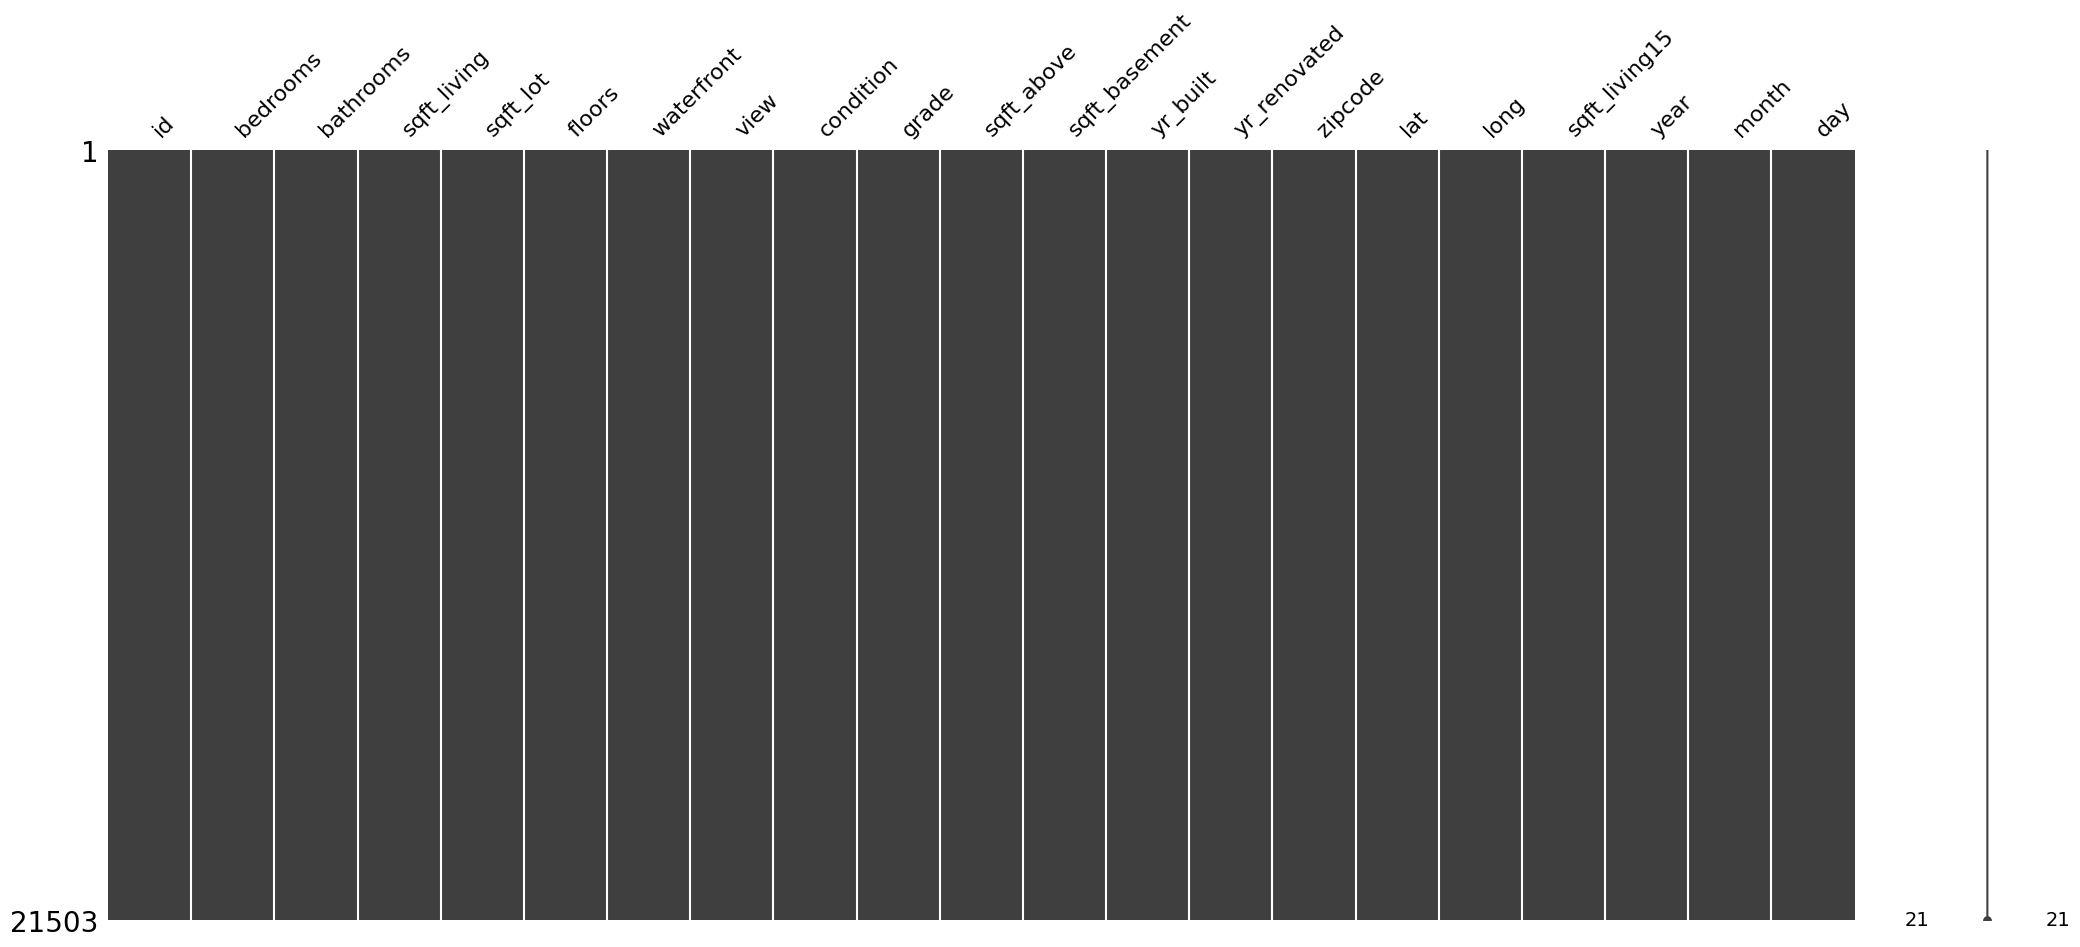

In [96]:
# handling missing values

def check_missing(data):
    msno.matrix(data)
    
    # double check!
    for c in data.columns:
        print('{} : {}'.format(c, len(data.loc[pd.isnull(data[c]), c].values)))

check_missing(df)

There is any missing value!

In [97]:
# Handing 'id' and date
sub_id = df['id'][train_len:]

def handle_id_date(df):
    # df['date'] = df['date'].apply(lambda x: str(x[:6])).astype(int)
    
    if 'id' in df.columns:
        del df['id']

    return df


In [100]:
handle_id_date(df)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,year,month,day
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,2014,10,13
1,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,2015,2,25
2,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,2015,2,18
3,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,2014,6,27
4,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,2015,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,3,1.75,1500,11968,1.0,0,0,3,6,1500,0,2014,0,98010,47.3095,-122.002,1320,2014,6,26
6464,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,2015,1,26
6465,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,2015,2,19
6466,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2014,6,23


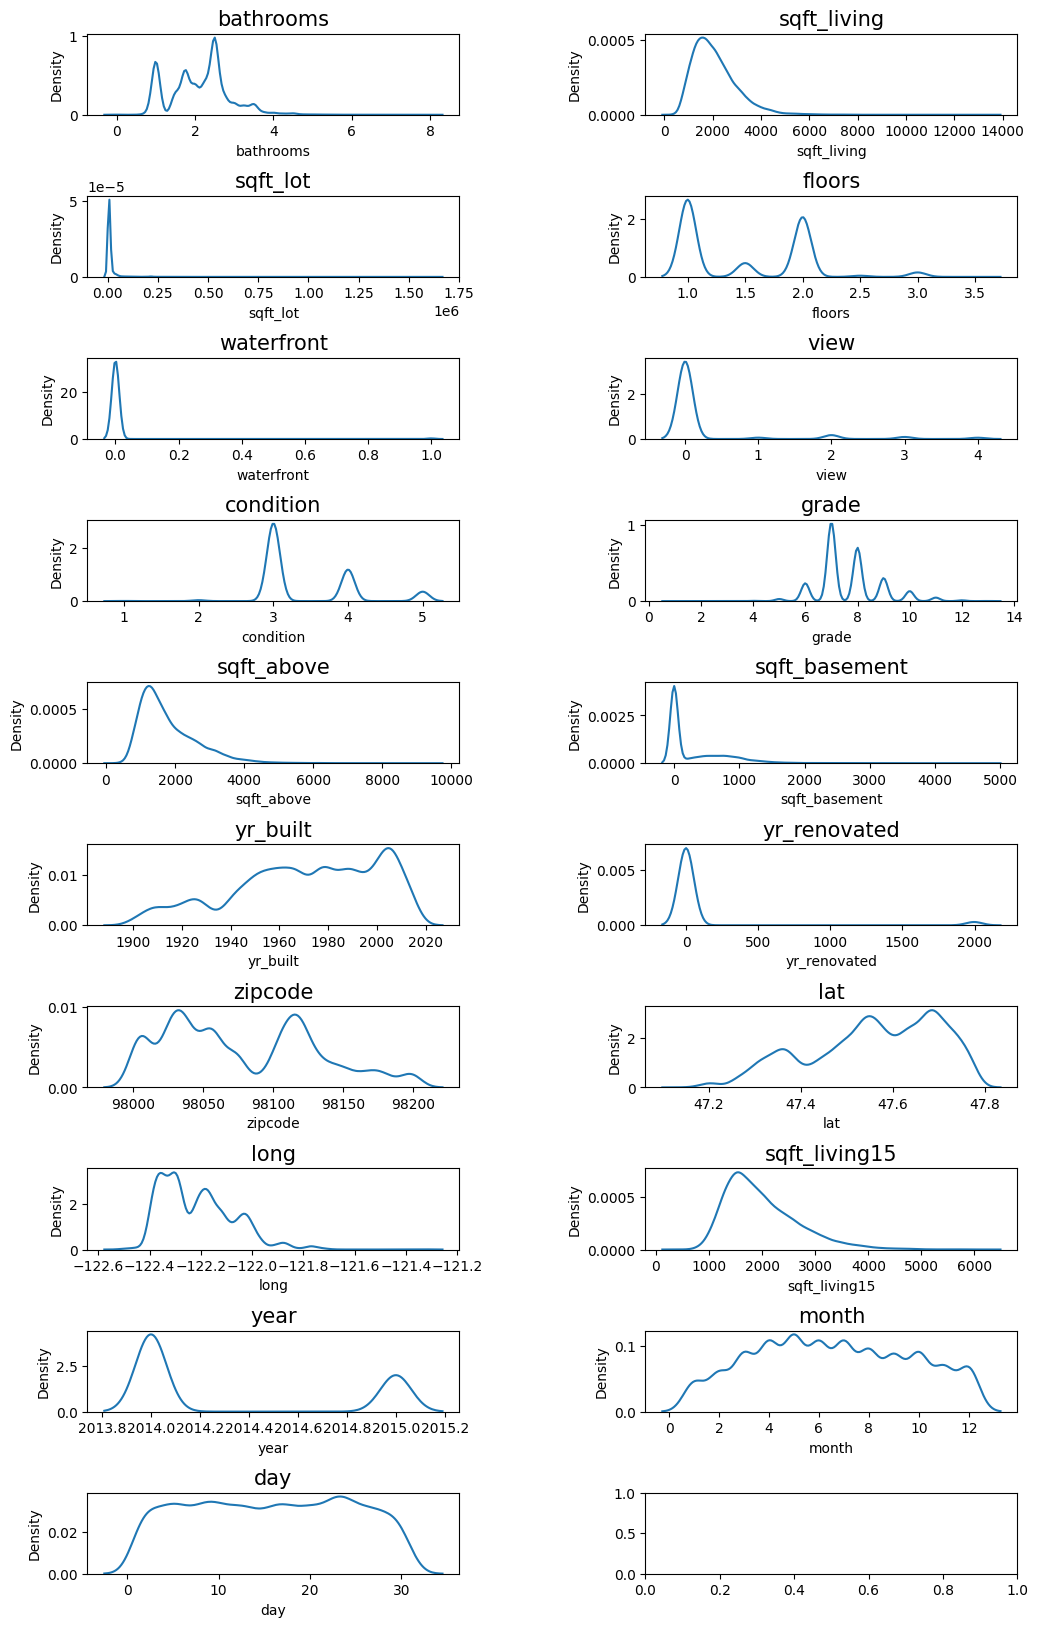

In [99]:
# check distribution

def check_distribution(df, col=1):
    row = int(df.shape[1] / col)

    count = 1
    columns = df.columns
    
    fig, ax = plt.subplots(row, col, figsize=(12,20))
    for i in range(row):
        for j in range(col):
            sns.kdeplot(data=df[columns[count]], ax=ax[i][j])
            ax[i][j].set_title(columns[count], fontsize=15)
            count += 1
            if count == df.shape[1]:
                break
    plt.subplots_adjust(wspace=0.5, hspace=1)
                
check_distribution(df, col=2)
            

- It seems that bedrooms, sqft_living, sqft_lot, sqft_above, sqft_basement features are skewd. so do log scaling

In [101]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

def log_scaling(data, skew_columns):
    for c in skew_columns:
        data[c] = np.log1p(data[c].values)
    return data

log_scaling(df, skew_columns)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,year,month,day
0,1.386294,1.00,7.074117,8.639588,1.0,0,0,3,7,7.074117,0.000000,1955,0,98178,47.5112,-122.257,1340,2014,10,13
1,1.098612,1.00,6.647688,9.210440,1.0,0,0,3,6,6.647688,0.000000,1933,0,98028,47.7379,-122.233,2720,2015,2,25
2,1.386294,2.00,7.427144,8.997271,1.0,0,0,3,8,7.427144,0.000000,1987,0,98074,47.6168,-122.045,1800,2015,2,18
3,1.386294,2.25,7.447751,8.827615,2.0,0,0,3,7,7.447751,0.000000,1995,0,98003,47.3097,-122.327,2238,2014,6,27
4,1.386294,1.50,6.966967,9.181118,1.0,0,0,3,7,6.966967,0.000000,1963,0,98198,47.4095,-122.315,1650,2015,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,1.386294,1.75,7.313887,9.390075,1.0,0,0,3,6,7.313887,0.000000,2014,0,98010,47.3095,-122.002,1320,2014,6,26
6464,1.386294,2.00,7.307202,7.027315,3.0,0,0,3,8,7.307202,0.000000,2014,0,98144,47.5699,-122.288,1400,2015,1,26
6465,1.386294,2.50,7.178545,7.166266,2.0,0,0,3,8,7.074117,4.875197,2008,0,98116,47.5773,-122.409,1330,2015,2,19
6466,1.098612,0.75,6.928538,7.208600,2.0,0,0,3,7,6.928538,0.000000,2009,0,98144,47.5944,-122.299,1020,2014,6,23


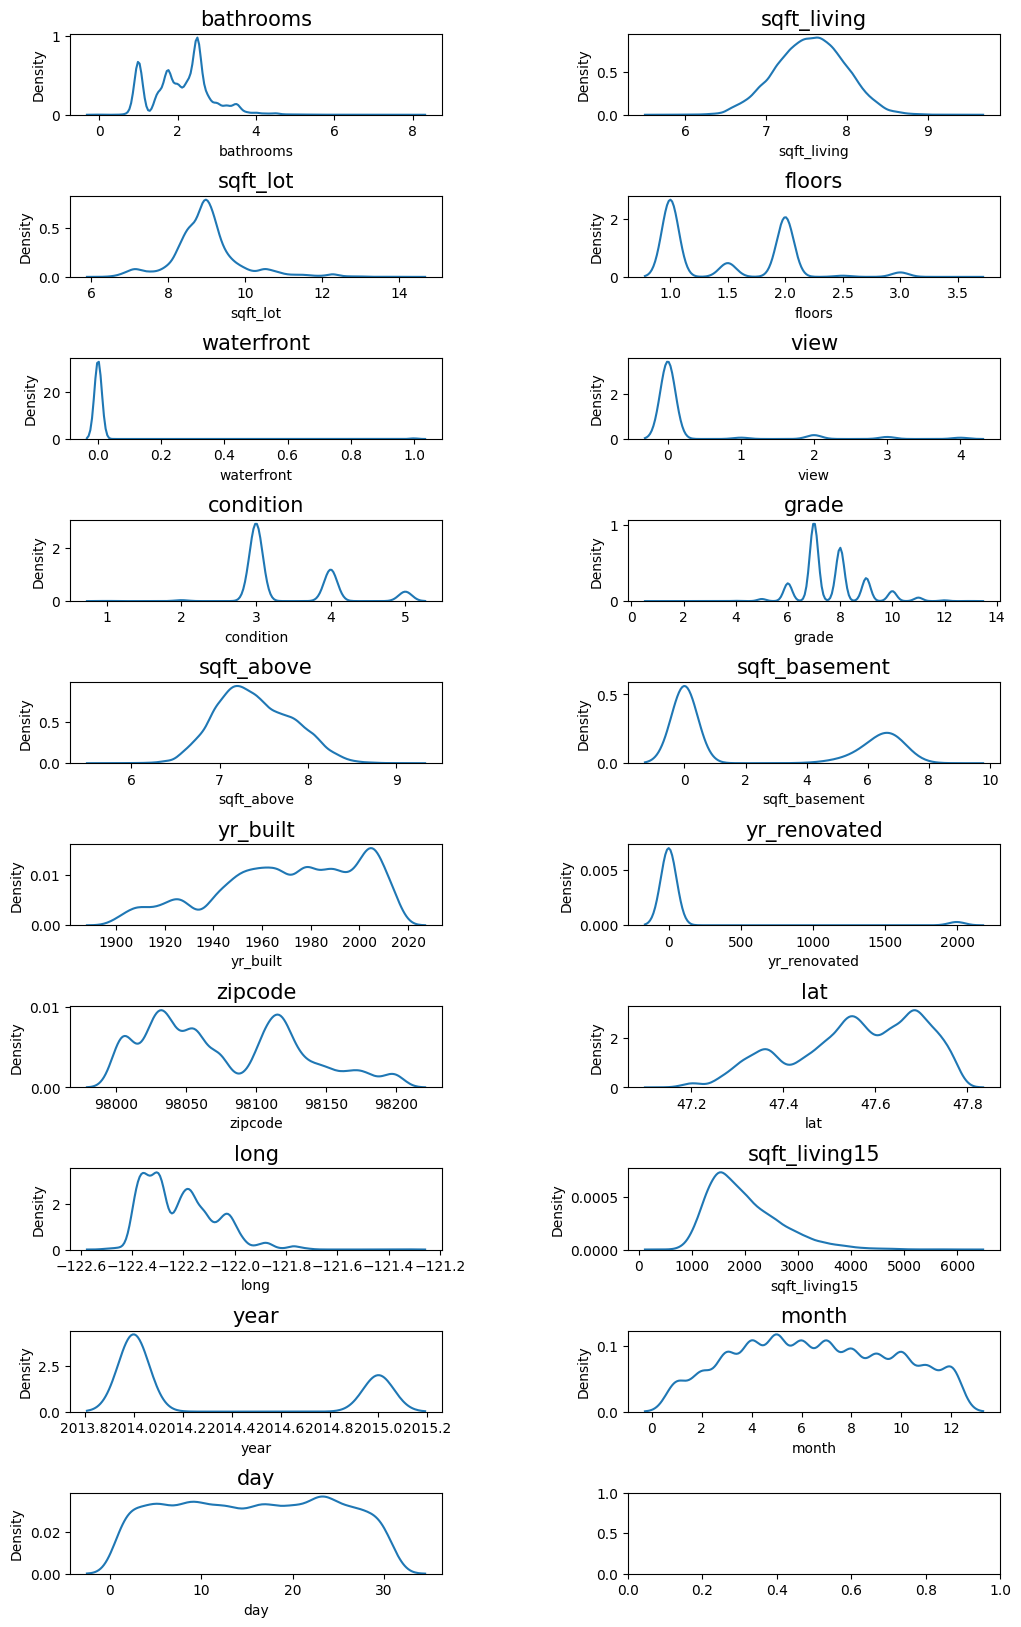

In [102]:
check_distribution(df, col=2)

It seems large that the difference in distribution between the values of each feature. so do normalization

In [103]:
# use robustscaler: minimize the impact of outliers
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('minmax_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])
df_scaled = pipeline.fit_transform(df)


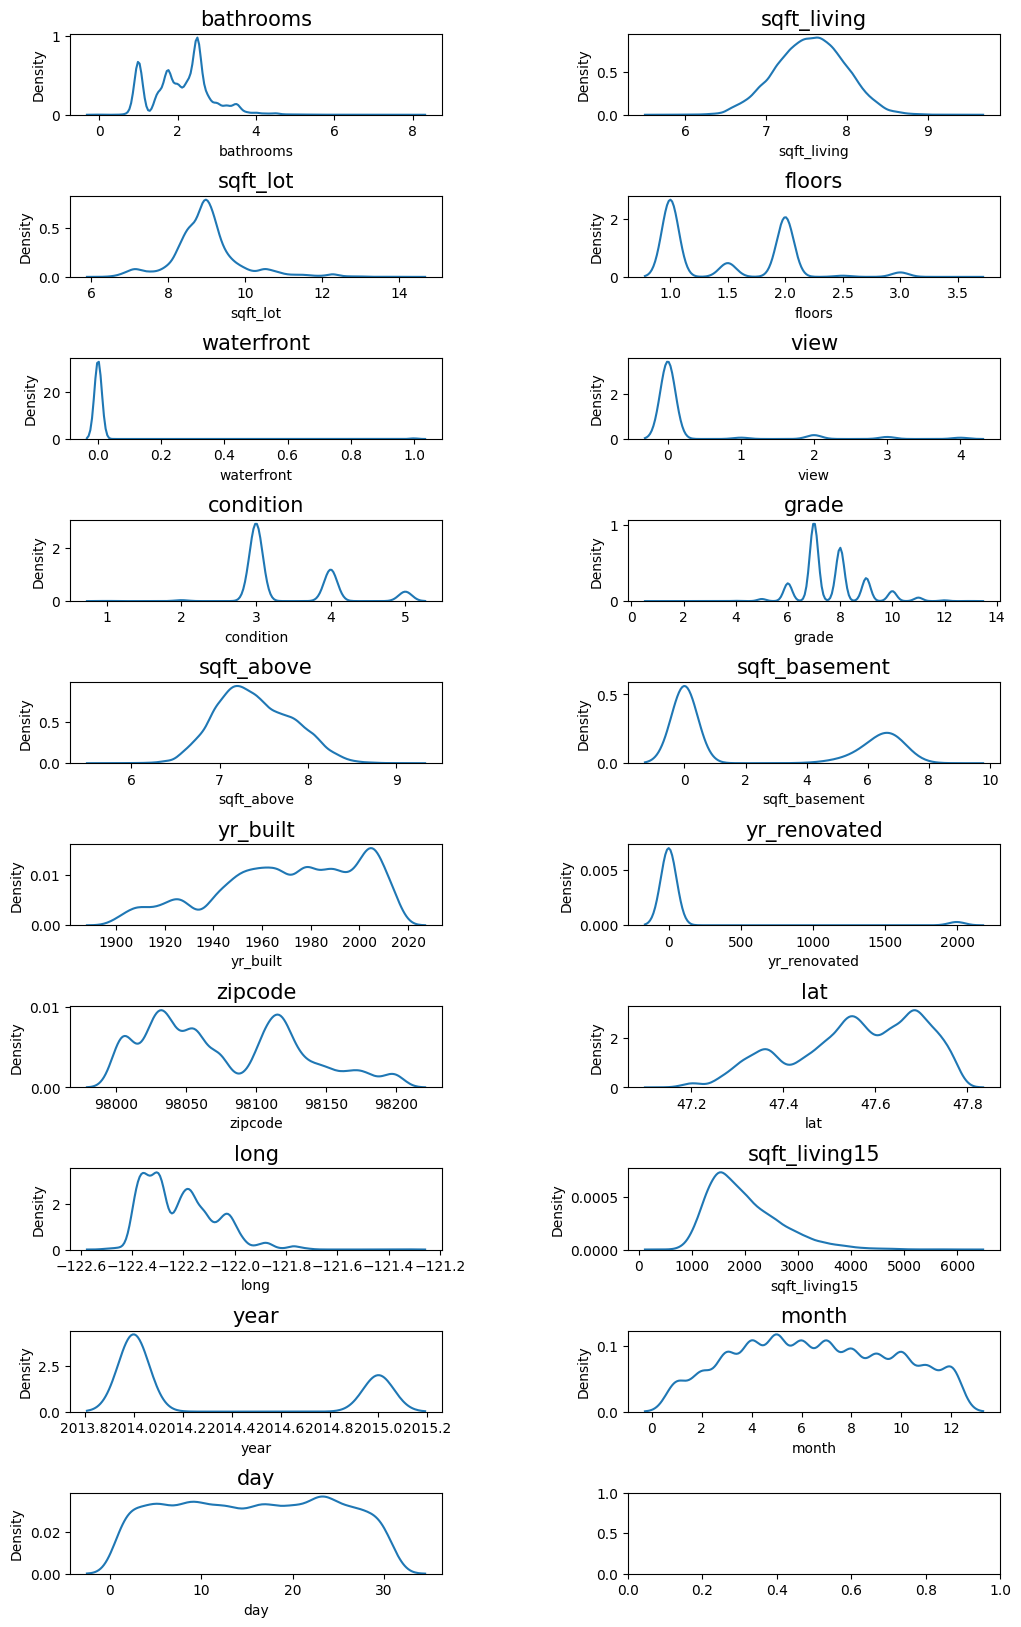

In [104]:
check_distribution(df, col=2)

#### check correlation

In [105]:
type(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)


In [20]:
df_scaled

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,-0.312373,-1.449405,-1.125342,-0.388537,-0.916636,-0.087397,-0.306117,-0.630274,-0.561280,-0.754090,...,-0.546615,-0.210569,1.871463,-0.352932,-0.306853,-0.944103,-0.260644,-0.686877,1.098109,-0.310907
1,-1.660447,-1.449405,-2.130102,0.243911,-0.916636,-0.087397,-0.306117,-0.630274,-1.412782,-1.752023,...,-1.295635,-0.210569,-0.932870,1.282568,-0.136435,1.068839,-0.172403,1.455865,-1.473234,1.078923
2,-0.312373,-0.150704,-0.293532,0.007741,-0.916636,-0.087397,-0.306117,-0.630274,0.290223,0.072069,...,0.542869,-0.210569,-0.072875,0.408907,1.198507,-0.273122,-0.192854,1.455865,-1.473234,0.268189
3,-0.312373,0.173971,-0.244977,-0.180222,0.934630,-0.087397,-0.306117,-0.630274,-0.561280,0.120294,...,0.815240,-0.210569,-1.400259,-1.806630,-0.803906,0.365768,-0.217877,-0.686877,-0.187562,1.310561
4,-0.312373,-0.800054,-1.377810,0.211424,-0.916636,-0.087397,-0.306117,-0.630274,-0.561280,-1.004843,...,-0.274244,-0.210569,2.245374,-1.086635,-0.718697,-0.491920,-0.112076,1.455865,-1.794652,-0.079268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21498,-0.312373,-0.475379,-0.560391,0.442929,-0.916636,-0.087397,-0.306117,-0.630274,-1.412782,-0.192977,...,1.462120,-0.210569,-1.269390,-1.808073,1.503839,-0.973276,-0.053834,-0.686877,-0.187562,1.194742
21499,-0.312373,-0.150704,-0.576141,-2.174776,2.785896,-0.087397,-0.306117,-0.630274,0.290223,-0.208620,...,1.462120,-0.210569,1.235814,0.070552,-0.526977,-0.856584,-0.422345,1.455865,-1.794652,1.194742
21500,-0.312373,0.498647,-0.879285,-2.020831,0.934630,-0.087397,-0.306117,-0.630274,0.290223,-0.754090,...,1.257842,-0.210569,0.712339,0.123939,-1.386168,-0.958690,-0.421065,1.455865,-1.473234,0.384008
21501,-1.660447,-1.774080,-1.468358,-1.973929,0.934630,-0.087397,-0.306117,-0.630274,-0.561280,-1.094776,...,1.291889,-0.210569,1.235814,0.247304,-0.605085,-1.410872,-0.393919,-0.686877,-0.187562,0.847284


In [21]:
df_scaled.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
count,2.150300e+04,2.150300e+04,2.150300e+04,2.150300e+04,2.150300e+04,2.150300e+04,2.150300e+04,2.150300e+04,2.150300e+04,2.150300e+04,...,2.150300e+04,2.150300e+04,2.150300e+04,2.150300e+04,2.150300e+04,2.150300e+04,2.150300e+04,2.150300e+04,2.150300e+04,2.150300e+04
mean,2.805426e-16,2.524553e-16,-1.450627e-16,-3.436564e-17,8.459235e-17,-5.452242e-17,-1.024361e-17,2.101591e-16,-3.013603e-16,1.182971e-16,...,-3.423347e-16,-2.445248e-17,2.012373e-16,-2.213941e-16,-2.352725e-16,-3.324215e-16,-2.313072e-17,5.947900e-18,1.073926e-16,1.738109e-16
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,...,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-6.808527e+00,-2.748106e+00,-4.425921e+00,-3.029593e+00,-9.166364e-01,-8.739701e-02,-3.061165e-01,-3.706954e+00,-5.670293e+00,-4.032245e+00,...,-2.419165e+00,-2.105686e-01,-1.437650e+00,-2.916202e+00,-2.167251e+00,-2.316697e+00,-4.435271e-01,-6.868771e-01,-1.794652e+00,-1.700736e+00
25%,-3.123729e-01,-4.753791e-01,-6.729196e-01,-5.150902e-01,-9.166364e-01,-8.739701e-02,-3.061165e-01,-6.302737e-01,-5.612795e-01,-7.147908e-01,...,-6.828003e-01,-2.105686e-01,-8.393925e-01,-6.422289e-01,-8.110071e-01,-7.253050e-01,-2.807649e-01,-6.868771e-01,-8.303980e-01,-8.900023e-01
50%,-3.123729e-01,1.739715e-01,1.355154e-02,-5.777293e-02,8.996760e-03,-8.739701e-02,-3.061165e-01,-6.302737e-01,-5.612795e-01,-1.012524e-01,...,1.343124e-01,-2.105686e-01,-2.411347e-01,8.498085e-02,-1.151331e-01,-2.147761e-01,-1.885732e-01,-6.868771e-01,-1.875623e-01,3.655065e-02
75%,7.332744e-01,4.986467e-01,6.892399e-01,3.174127e-01,9.346299e-01,-8.739701e-02,-3.061165e-01,9.080663e-01,2.902228e-01,7.134183e-01,...,8.833323e-01,-2.105686e-01,7.310342e-01,8.511483e-01,6.304462e-01,5.583105e-01,-9.839371e-02,1.455865e+00,7.766913e-01,8.472845e-01
max,9.715945e+00,7.641502e+00,4.622330e+00,5.901595e+00,3.711529e+00,1.144204e+01,4.912851e+00,2.446406e+00,4.547734e+00,4.103062e+00,...,1.496167e+00,4.796346e+00,2.264070e+00,1.568979e+00,6.382058e+00,6.159542e+00,3.140463e+01,1.455865e+00,1.740945e+00,1.773837e+00


In [22]:
df =df_scaled

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21503 entries, 0 to 21502
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21503 non-null  float64
 1   bathrooms      21503 non-null  float64
 2   sqft_living    21503 non-null  float64
 3   sqft_lot       21503 non-null  float64
 4   floors         21503 non-null  float64
 5   waterfront     21503 non-null  float64
 6   view           21503 non-null  float64
 7   condition      21503 non-null  float64
 8   grade          21503 non-null  float64
 9   sqft_above     21503 non-null  float64
 10  sqft_basement  21503 non-null  float64
 11  yr_built       21503 non-null  float64
 12  yr_renovated   21503 non-null  float64
 13  zipcode        21503 non-null  float64
 14  lat            21503 non-null  float64
 15  long           21503 non-null  float64
 16  sqft_living15  21503 non-null  float64
 17  sqft_lot15     21503 non-null  float64
 18  year  

KeyError: 'price'

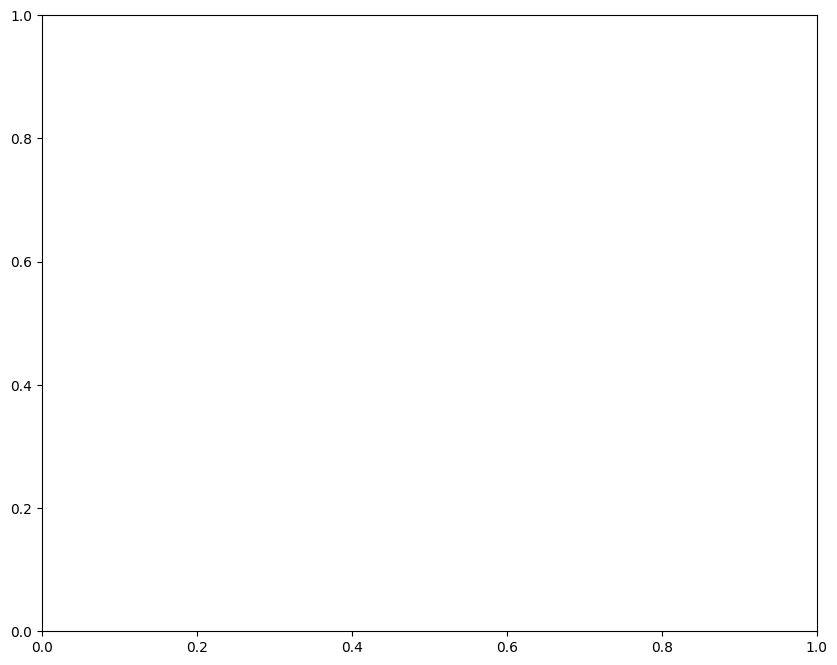

In [112]:

fig = plt.figure(figsize = (10, 8))
ax = fig.gca()

cor_abs = abs(train.corr(method='spearman')) 

cor_cols = cor_abs.nlargest(n=25, columns='price').index
columns = cor_cols.values

print(columns)

sns.set()
corr = train[columns].corr(method='pearson')
heatmap = sns.heatmap(corr, annot=True,
                      yticklabels=columns, 
                      xticklabels=columns,
                      ax=ax, cmap="RdYlBu")
plt.tight_layout()
plt.show()

The factors that greatly affect the price of a house seem to be, in order, the grade of the house, the size of the house, and the location.

In [ ]:
train_len

15035

In [106]:
test = df.iloc[train_len:, :] 
train = df.iloc[:train_len, :] 

In [25]:
train.head()



,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,-0.312373,-1.449405,-1.125342,-0.388537,-0.916636,-0.087397,-0.306117,-0.630274,-0.561280,-0.754090,...,-0.546615,-0.210569,1.871463,-0.352932,-0.306853,-0.944103,-0.260644,-0.686877,1.098109,-0.310907
1,-1.660447,-1.449405,-2.130102,0.243911,-0.916636,-0.087397,-0.306117,-0.630274,-1.412782,-1.752023,...,-1.295635,-0.210569,-0.932870,1.282568,-0.136435,1.068839,-0.172403,1.455865,-1.473234,1.078923
2,-0.312373,-0.150704,-0.293532,0.007741,-0.916636,-0.087397,-0.306117,-0.630274,0.290223,0.072069,...,0.542869,-0.210569,-0.072875,0.408907,1.198507,-0.273122,-0.192854,1.455865,-1.473234,0.268189
3,-0.312373,0.173971,-0.244977,-0.180222,0.934630,-0.087397,-0.306117,-0.630274,-0.561280,0.120294,...,0.815240,-0.210569,-1.400259,-1.806630,-0.803906,0.365768,-0.217877,-0.686877,-0.187562,1.310561
4,-0.312373,-0.800054,-1.377810,0.211424,-0.916636,-0.087397,-0.306117,-0.630274,-0.561280,-1.004843,...,-0.274244,-0.210569,2.245374,-1.086635,-0.718697,-0.491920,-0.112076,1.455865,-1.794652,-0.079268


<Axes: xlabel='price', ylabel='Density'>

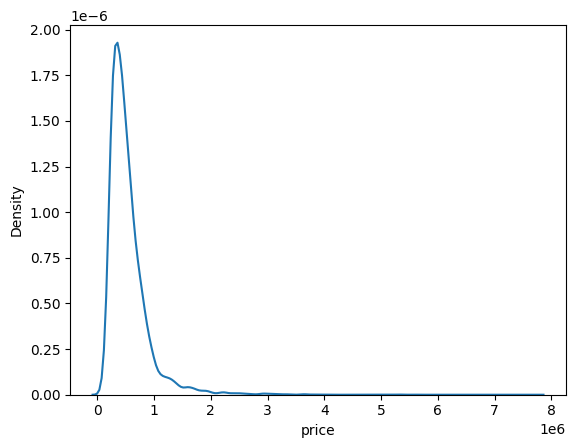

In [113]:
sns.kdeplot(data=y)


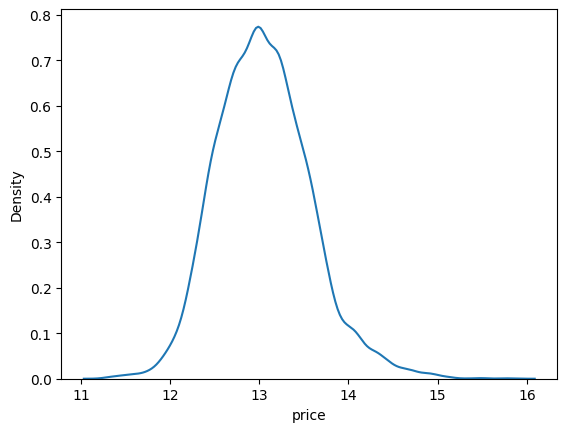

In [114]:
y = np.log1p(y)
sns.kdeplot(y)
plt.show()

## 3. Modeling

In [115]:

def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))


In [116]:
random_state = 42

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

In [117]:
def save_submission(model):
    predictions = model.predict(test)
    predictions = np.expm1(predictions)
    sub = pd.DataFrame(data={'id':sub_id,'price':predictions})
    sub.to_csv('submission.csv', index=False)
    print('submission complete!')
def get_scores(models, train, y):
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
            
    return score_df

get_scores(models, train, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000520 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2077
[LightGBM] [Info] Number of data points in the train set: 12028, number of used features: 20
[LightGBM] [Info] Start training from score 13.047364


KeyboardInterrupt: 

#### grid search

In [107]:
from sklearn.model_selection import RandomizedSearchCV

In [118]:
def get_gs_result(
    model, train, y, 
    param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
},
    n_iter=100, 
    verbose=2, 
    n_jobs=5
):

    grid_model = RandomizedSearchCV(
        model, param_distributions=param_grid, 
        n_iter=n_iter, 
        scoring='neg_mean_squared_error', 
        cv=5, verbose=verbose, n_jobs=n_jobs
    )

    grid_model.fit(train, y)
    save_submission(grid_model)

    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    results = pd.DataFrame(params)
    results['score'] = score
    
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [64]:
import lightgbm as lgb

param = {
    "objective" : "regression",
    "metric" : "rmse",
    "boosting": 'gbdt',
    "max_depth" : -1,
    "num_leaves" : 5,
    "min_data_in_leaf": 5,
    "bagging_freq": 5,
    "learning_rate" : 0.01,
    "bagging_fraction" : 0.464,
    "feature_fraction" : 0.582,
    "tree_learner": "serial",
    "boost_from_average": "false",
    "verbosity" : 1,
    "feature_fraction_seed" : random_state,
    "bagging_fraction_seed" : random_state,
    "random_state": random_state
}   

In [73]:
from sklearn.linear_model import LinearRegression

In [119]:
clf = LinearRegression.fit(train.to_numpy() , y)

AttributeError: 'numpy.ndarray' object has no attribute '_validate_params'

In [71]:
save_submission(clf)

submission complete!


In [120]:
get_gs_result(
    LGBMRegressor(random_state=random_state), train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2117
[LightGBM] [Info] Number of data points in the train set: 15035, number of used features: 20
[LightGBM] [Info] Start training from score 13.048122
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
submission complete!


,n_estimators,max_depth,score,RMSLE
3,100,10,-0.027173,0.164842
2,50,10,-0.029499,0.171753
1,100,1,-0.055023,0.234570
0,50,1,-0.073398,0.270920


In [57]:
get_gs_result(
    XGBRegressor(random_state=random_state), train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
submission complete!


,n_estimators,max_depth,score,RMSLE
2,50,10,-0.031955,0.178760
3,100,10,-0.032093,0.179145
1,100,1,-0.043208,0.207865
0,50,1,-0.048675,0.220625


In [58]:
get_gs_result(
    RandomForestRegressor(random_state=random_state), train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
submission complete!


,n_estimators,max_depth,score,RMSLE
3,100,10,-0.035331,0.187965
2,50,10,-0.035543,0.188528
0,50,1,-0.178965,0.423043
1,100,1,-0.179058,0.423153


In [63]:
# GradientBoostingRegressor Model
get_gs_result(
    GradientBoostingRegressor(random_state=random_state), train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
submission complete!


,n_estimators,max_depth,score,RMSLE
3,100,10,-0.029851,0.172773
2,50,10,-0.030275,0.173997
1,100,1,-0.055039,0.234604
0,50,1,-0.073256,0.270658


### ensemble

In [60]:
from sklearn.ensemble import StackingRegressor

def get_stacking_model():
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

    gboost = GradientBoostingRegressor(max_depth=10, n_estimators=100,random_state=random_state)
    xgboost = XGBRegressor(max_depth=10, n_estimators=50,random_state=random_state)
    lightgbm = LGBMRegressor(max_depth=10, n_estimators=100,random_state=random_state)
    rdforest = RandomForestRegressor(max_depth=10, n_estimators=100,random_state=random_state)

    stack_models = [
        ('gb', gboost),
        ('xgb', xgboost),
        ('lgbm', lightgbm),
        ('rf', rdforest)
    ]
    
    stack_reg = StackingRegressor(stack_models, final_estimator=gboost)
    stack_reg.fit(X_train, y_train)
    
    y_pred = stack_reg.predict(X_test)
    print(f'rmse: {rmse(y_pred, y_test)}')
    
    return stack_reg

s_model = get_stacking_model()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000670 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2338
[LightGBM] [Info] Number of data points in the train set: 12028, number of used features: 21
[LightGBM] [Info] Start training from score 13.047364
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000559 seconds.
You can set `force_col_wise=true`

## submission

In [61]:
def save_submission(model):
    predictions = model.predict(test)
    predictions = np.expm1(predictions)
    sub = pd.DataFrame(data={'id':sub_id,'price':predictions})
    sub.to_csv('submission.csv', index=False)
    print('submission complete!')

In [62]:
save_submission(s_model)
    

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
submission complete!
